In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from io import StringIO

In [69]:
file_path = 'heart.csv'

df = pd.read_csv(file_path)

In [31]:
# Age: Age
# Sex: Sex
# cp: Chest pain
# trtbps: resting blood preassure
# chol: cholesteral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results
# thalachh: maximum heart rate achieved
# exng: exercise induced angina
# oldpeak: Previous peak
# slp: Slope
# caa: Number of major vessels (0-3)
# thall: Thal rate
# output: Target variable


In [70]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
missing_values = df.isnull()
print(missing_values)

       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng   
0    False  False  False   False  False  False    False     False  False  \
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  

In [74]:
df.fillna(df.mean(), inplace=True)

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df.to_csv('cleandata.csv', index=False)

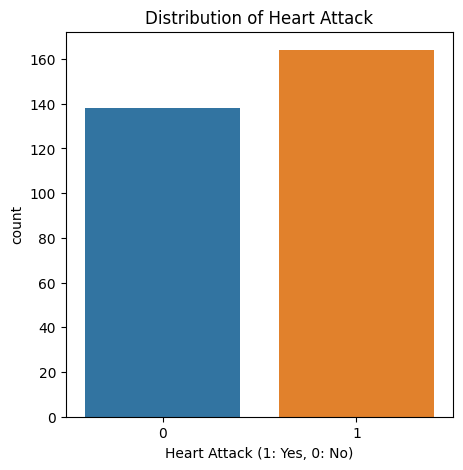

In [99]:
plt.figure(figsize=(5,5))
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack')
plt.xlabel('Heart Attack (1: Yes, 0: No)')
plt.show()

In [97]:
correlation_matrix = df.corr()

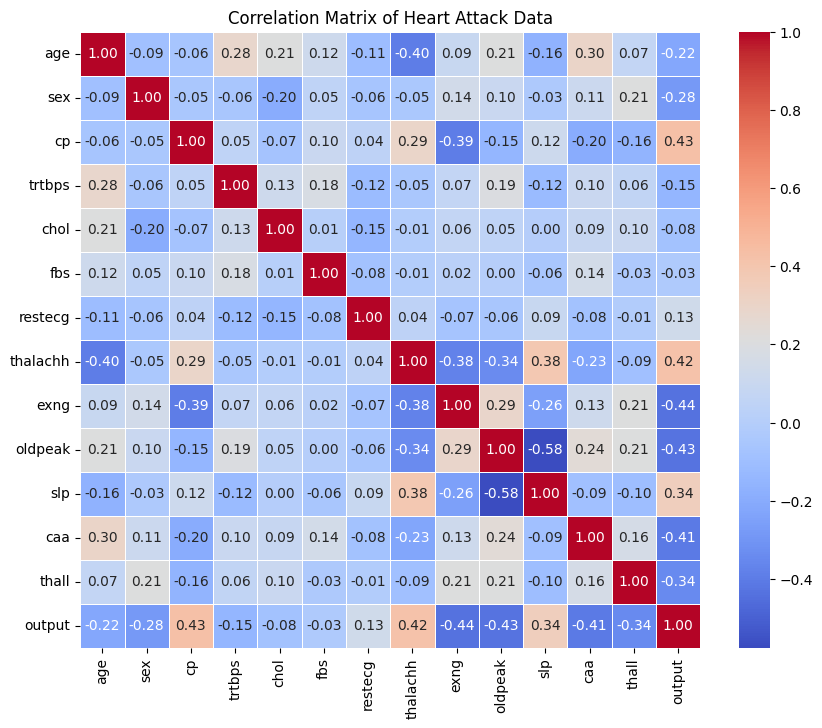

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Heart Attack Data')
plt.show()

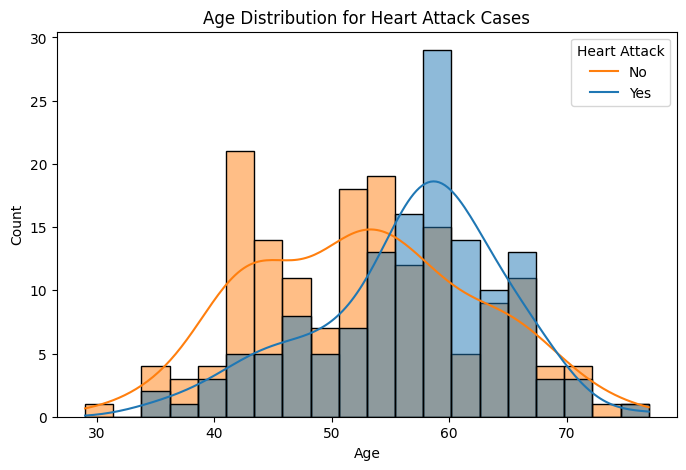

In [118]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='output', bins=20, kde=True)
plt.title('Age Distribution for Heart Attack Cases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

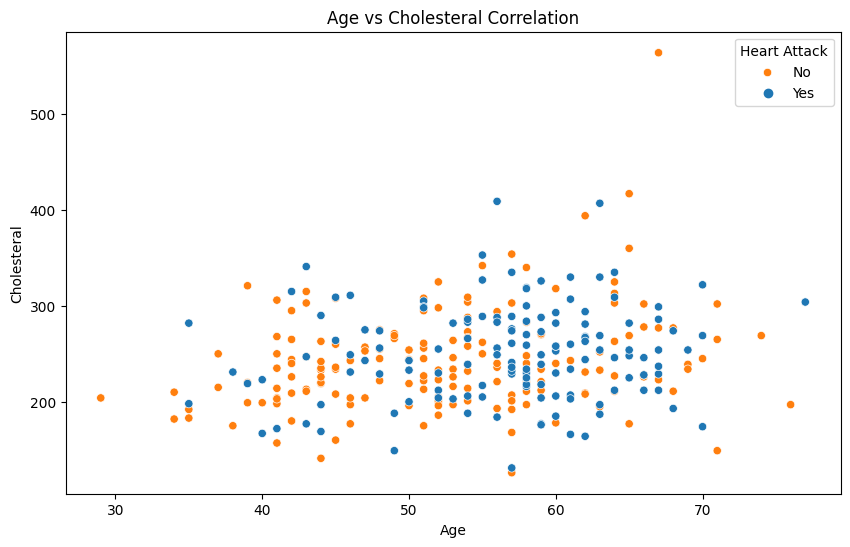

In [126]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df, x='age', y='chol', hue='output')
plt.title('Age vs Cholesteral Correlation')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack', labels=['No','Yes'])
plt.show()